In [1]:
'''
【项目06】  多场景下的图表可视化表达

课程数据：
2016年奥运运动员数据，数据格式为xlsx，分3个sheet

1、分男女分别分析运动员的身高分布，并制作图表，数据为“奥运运动员数据.xlsx，sheet → 运动员信息”
要求：
① 制作分布密度图
② 计算出男女平均身高，并绘制辅助线表示
提示：
① 可视化制图方法 → sns.distplot()
② 辅助线制图方法 → plt.axvline()
③ 分男女分别筛选数据并制作图表
④ 不需要创建函数

2、综合指标判断运动员的身材，并找到TOP8的运动员，并制作图表，数据为“奥运运动员数据.xlsx，sheet → 运动员信息”
要求：
① 针对不同指标，绘制面积堆叠图
② TOP8的运动员，绘制雷达图表示
提示：
① 四个指标评判运动员身材，并加权平均
   a. BMI 指数（BMI =体重kg ÷ 身高m**2，详细信息可百度查询）→ 越接近22分数越高
   b. 腿长/身高 指数 → 数据筛选，只选取小于0.7的数据，越大分数越高
   c. 臂展/身高 指数 → 数据筛选，只选取大于0.7的数据，比值越接近1分数越高
   d. 年龄 指数 → 年龄越小分数越高
   对上述abcd指标分别标准化得到n1,n2,n3,n4（划分到0-1的分值）
   最后评分： finalscore = (n1 + n2 + n3 + n4)/4
② 制作堆叠面积图，data.plot.area()
③ 雷达图需要构建子图 + for循环遍历得到

3、根据运动员CP数据，分析出CP综合热度，通过python处理数据并导出，在Gephi中绘制图表，数据为“奥运运动员数据.xlsx，sheet → 运动员CP热度”
要求：
① 用python计算出综合热度指标
② 用Gephi绘制关系可视化图表
提示：
① 三个指标评判运动员CP综合热度，并加权平均
   a. cp微博数量 → 数量越多分数越高
   b. cp微博话题阅读量 → 阅读量越多分数越高
   c. B站cp视频播放量 → 播放量越大分数越高
   对上述abcd指标分别标准化得到n1,n2,n3,n4（划分到0-1的分值）
   最后评分： finalscore = n1*0.5 + n2*0.3 + n3*0.2
② Gephi中布局模式选择“ForceAtlas2”
③ Gephi中通过模块化计算，给关联结果做分组，并且以此分组设定点颜色

'''

'\n【项目06】  多场景下的图表可视化表达\n\n课程数据：\n2016年奥运运动员数据，数据格式为xlsx，分3个sheet\n\n1、分男女分别分析运动员的身高分布，并制作图表，数据为“奥运运动员数据.xlsx，sheet → 运动员信息”\n要求：\n① 制作分布密度图\n② 计算出男女平均身高，并绘制辅助线表示\n提示：\n① 可视化制图方法 → sns.distplot()\n② 辅助线制图方法 → plt.axvline()\n③ 分男女分别筛选数据并制作图表\n④ 不需要创建函数\n\n2、综合指标判断运动员的身材，并找到TOP8的运动员，并制作图表，数据为“奥运运动员数据.xlsx，sheet → 运动员信息”\n要求：\n① 针对不同指标，绘制面积堆叠图\n② TOP8的运动员，绘制雷达图表示\n提示：\n① 四个指标评判运动员身材，并加权平均\n   a. BMI 指数（BMI =体重kg ÷ 身高m**2，详细信息可百度查询）→ 越接近22分数越高\n   b. 腿长/身高 指数 → 数据筛选，只选取小于0.7的数据，越大分数越高\n   c. 臂展/身高 指数 → 数据筛选，只选取大于0.7的数据，比值越接近1分数越高\n   d. 年龄 指数 → 年龄越小分数越高\n   对上述abcd指标分别标准化得到n1,n2,n3,n4（划分到0-1的分值）\n   最后评分： finalscore = (n1 + n2 + n3 + n4)/4\n② 制作堆叠面积图，data.plot.area()\n③ 雷达图需要构建子图 + for循环遍历得到\n\n3、根据运动员CP数据，分析出CP综合热度，通过python处理数据并导出，在Gephi中绘制图表，数据为“奥运运动员数据.xlsx，sheet → 运动员CP热度”\n要求：\n① 用python计算出综合热度指标\n② 用Gephi绘制关系可视化图表\n提示：\n① 三个指标评判运动员CP综合热度，并加权平均\n   a. cp微博数量 → 数量越多分数越高\n   b. cp微博话题阅读量 → 阅读量越多分数越高\n   c. B站cp视频播放量 → 播放量越大分数越高\n   对上述abcd指标分别标准化得到n1,n2,n3,n4（划分到0-1的分值）\n   最后评分： finals

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
import os

import warnings
warnings.filterwarnings('ignore') 

sns.set_style('white')
sns.set_context('paper')

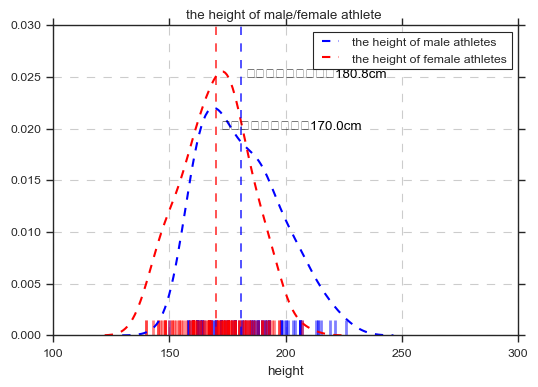

In [2]:
'''
1、分男女分别分析运动员的身高分布，并制作图表，数据为“奥运运动员数据.xlsx，sheet → 运动员信息”
要求：
① 制作分布密度图
② 计算出男女平均身高，并绘制辅助线表示
提示：
① 可视化制图方法 → sns.distplot()
② 辅助线制图方法 → plt.axvline()
③ 分男女分别筛选数据并制作图表
④ 不需要创建函数

'''
data = pd.read_excel(r'C:\Users\acer\Desktop\奥运运动员数据.xlsx',sheetname ='运动员信息')
# 对 男女运动员进行分类
data1 = data[data['gender'] == '男']
data1.reset_index(drop = True,inplace = True)

data2 = data[data['gender'] == '女']
data2.reset_index(drop = True,inplace = True)
#print(data1.head())
# 对男女运动员进行分类

mheight_mean = data1['height'].mean()
fmheight_mean = data2['height'].mean()
# 计算男女运动员平均身高

sns.distplot(data1['height'],hist = False,kde = True,rug = True,   
kde_kws={"color":"blue", "lw":1.5, 'linestyle':'--'},  
rug_kws={'color':'blue','alpha':0.5, 'lw':2}, label='the height of male athletes')
#男运动员分布密度图

sns.distplot(data2['height'],hist = False,kde = True,rug = True,   
kde_kws={"color":"red", "lw":1.5, 'linestyle':'--'},  
rug_kws={'color':'red','alpha':0.5, 'lw':2}, label='the height of female athletes')
# 女运动员分布密度图

plt.axvline(mheight_mean ,color='blue',linestyle = '--',alpha=0.8)
plt.text(mheight_mean +2,0.025,"男运动员平均身高为%.1fcm"%mheight_mean ,color = 'black')

plt.axvline(fmheight_mean,color='red',linestyle='--',alpha=0.8)
plt.text(fmheight_mean+2,0.020,"女运动员平均身高为%.1fcm"%fmheight_mean,color = 'black')
# 男女平均身高辅助线

plt.grid(linestyle = '--')
plt.xlim([100,300])
plt.title('the height of male/female athlete ')
plt.legend(loc = 'best')

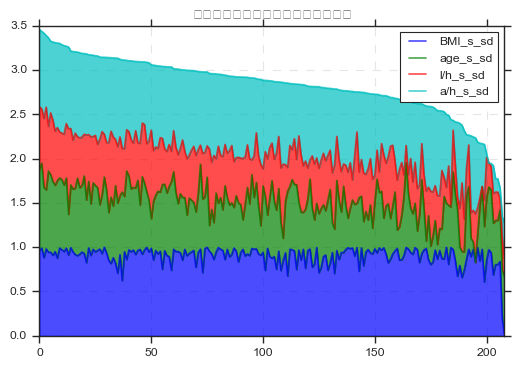

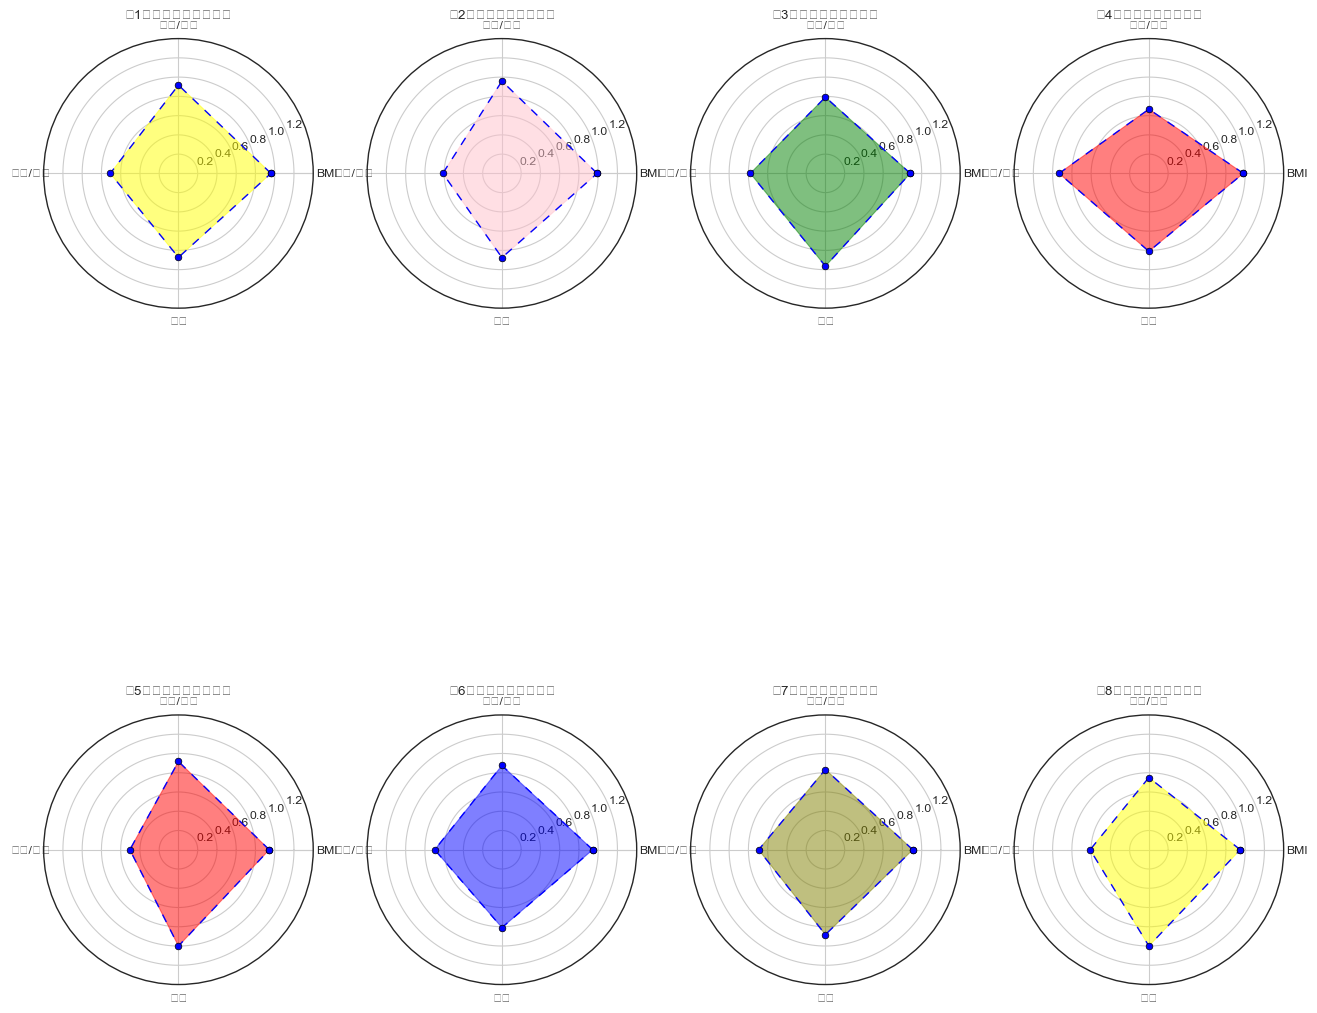

In [26]:
'''
2、综合指标判断运动员的身材，并找到TOP8的运动员，并制作图表，数据为“奥运运动员数据.xlsx，sheet → 运动员信息”
要求：
① 针对不同指标，绘制面积堆叠图
② TOP8的运动员，绘制雷达图表示
提示：
① 四个指标评判运动员身材，并加权平均
   a. BMI 指数（BMI =体重kg ÷ 身高m**2，详细信息可百度查询）→ 越接近22分数越高
   b. 腿长/身高 指数 → 数据筛选，只选取小于0.7的数据，越大分数越高
   c. 臂展/身高 指数 → 数据筛选，只选取大于0.7的数据，比值越接近1分数越高
   d. 年龄 指数 → 年龄越小分数越高
   对上述abcd指标分别标准化得到n1,n2,n3,n4（划分到0-1的分值）
   最后评分： finalscore = (n1 + n2 + n3 + n4)/4
② 制作堆叠面积图，data.plot.area()
③ 雷达图需要构建子图 + for循环遍历得到
'''
data = pd.read_excel(r'C:\Users\acer\Desktop\奥运运动员数据.xlsx',sheetname ='运动员信息')
# 读取数据
data['BMI'] = data['weight'] / ((data['height'] / 100)**2)  #计算BMI
data['BMI_s'] = 100-abs(data['BMI']-22)  # 给BMI指标打分
data['age_s'] = 100 - data['age']         #给年龄指标打分
data['l/h_s'] = data['leg'] / data['height']    #计算 腿长/身高 指数，同时以该项值代表分值
data['a/h_s'] = 1 - abs((data['arm'] / data['height']) - 1)     #计算 臂展/身高 指数，同时以该项值代表分值

data = data[data['l/h_s']<0.7]
data = data[data['a/h_s']>0.7]
# 晒选数据
# print(data.head(10))


new_data = data[['name','age','gender','BMI_s','age_s','l/h_s','a/h_s']]
new_data.dropna(inplace=True)
# 删除空值
new_data['BMI_s_sd'] = (new_data['BMI_s'] - new_data['BMI_s'].min()) / (new_data['BMI_s'].max()-new_data['BMI_s'].min())
new_data['age_s_sd'] = (new_data['age_s'] - new_data['age_s'].min()) / (new_data['age_s'].max()-new_data['age_s'].min())
new_data['l/h_s_sd'] = (new_data['l/h_s'] - new_data['l/h_s'].min()) / (new_data['l/h_s'].max()-new_data['l/h_s'].min())
new_data['a/h_s_sd'] = (new_data['a/h_s'] - new_data['a/h_s'].min()) / (new_data['a/h_s'].max()-new_data['a/h_s'].min())
# 对各项指标分数进行指标化处理

new_data['finals'] =(new_data['BMI_s_sd']+new_data['l/h_s_sd']+new_data['a/h_s_sd']+new_data['age_s_sd']) / 4
# 计算最后评分
new_data.sort(columns='finals',inplace=True,ascending=False)
# 按照总分给运动员排序
new_data.reset_index(inplace=True,drop=True)
# 给序列重列序


plt.figure(figsize=(10,7))
new_data[['BMI_s_sd','age_s_sd','l/h_s_sd','a/h_s_sd']].plot.area(alpha= 0.7)
plt.grid(linestyle='--',alpha=0.5)
plt.title('奥运运动员各项指标得分面积堆叠图')
plt.legend()


labels = ['BMI','腿长/身高','臂长/身高','年龄']
# 设置雷达图的得分标签
angels = np.linspace(0,2*np.pi,4,endpoint=False)
angels = np.concatenate((angels,[angels[0]]))
plt.figure(figsize=(16,16))
color = np.random.choice(['red','yellow','pink','olive','blue','purple','green'])
for i in range(8):
    data8 = new_data.iloc[i][['BMI_s_sd','age_s_sd','l/h_s_sd','a/h_s_sd']]
    data8 = np.concatenate((data8,[data8[0]]))
    ax = plt.subplot(241+i,projection = 'polar')
    # 创建极坐标
    ax.plot(angels,data8,'o--',linewidth=1)
    ax.fill(angels,data8,alpha = 0.5,color = np.random.choice(['red','yellow','pink','olive','blue','purple','green']))
    plt.thetagrids(angels * 180/np.pi,labels) 
    # 设置网格、标签
    plt.ylim(0,1.4)  
    # polar的极值设置为ylim
    plt.title('第%d名的各项得分雷达图'%(i+1))
    

In [25]:
'''3、根据运动员CP数据，分析出CP综合热度，通过python处理数据并导出，在Gephi中绘制图表，数据为“奥运运动员数据.xlsx，sheet → 运动员CP热度”
要求：
① 用python计算出综合热度指标
② 用Gephi绘制关系可视化图表
提示：
① 三个指标评判运动员CP综合热度，并加权平均
   a. cp微博数量 → 数量越多分数越高
   b. cp微博话题阅读量 → 阅读量越多分数越高
   c. B站cp视频播放量 → 播放量越大分数越高
   对上述abcd指标分别标准化得到n1,n2,n3,n4（划分到0-1的分值）
   最后评分： finalscore = n1*0.5 + n2*0.3 + n3*0.2
② Gephi中布局模式选择“ForceAtlas2”
③ Gephi中通过模块化计算，给关联结果做分组，并且以此分组设定点颜色

'''

data_cp = pd.read_excel(r'C:\Users\acer\Desktop\奥运运动员数据.xlsx',sheetname ='运动员CP热度')
data_cp.replace('无数据',np.nan,inplace = True)
data_cp.fillna(0,inplace = True)
# 将‘无数据’和空值替换为0
# print(data_cp.head())

data_cp['cp_wbs'] = (data_cp['cp微博数量'] / data_cp['cp微博数量'].sum()) * 100
data_cp['cp_tps'] = (data_cp['cp微博话题阅读量'] / data_cp['cp微博话题阅读量'].sum()) * 100
data_cp['cp_bs'] = (data_cp['B站cp视频播放量'] / data_cp['B站cp视频播放量'].sum()) * 100
# 百分比占比作为衡量分数的指标

data_cp['cp_wbs_sd'] = (data_cp['cp_wbs'] - data_cp['cp_wbs'].min()) / (data_cp['cp_wbs'].max() - data_cp['cp_wbs'].min())
data_cp['cp_tps_sd'] = (data_cp['cp_tps'] - data_cp['cp_tps'].min()) / (data_cp['cp_tps'].max() - data_cp['cp_tps'].min())
data_cp['cp_bs_sd'] = (data_cp['cp_bs'] - data_cp['cp_bs'].min()) / (data_cp['cp_bs'].max() - data_cp['cp_bs'].min())
# 将各项分数标准化
data_cp['finals'] = (data_cp['cp_wbs_sd']*0.5 + data_cp['cp_tps_sd']*0.3 + data_cp['cp_bs_sd']*0.2 )
# 计算最终得分
data_cp = data_cp[['p1','p2','finals']]
path = r"C:\Users\acer\Desktop"

writer = pd.ExcelWriter(r'C:\Users\acer\Desktop\奥运运动员cp数据.xlsx')
data_cp.to_excel(writer,'sheet1')
writer.save()
print('finished')

finished
